In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

sns.set()

def test_stationarity(timeseries):
    # 执行Dickey-Fuller测试
    # print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    # print(dfoutput)
    return dfoutput['p-value']

In [17]:
data = pd.read_csv('../data/processed/data_filter.csv', index_col=0)
data

,9012,9384,9336,9173,9391,9392,9373,9374,9379,9380,...,9180,9177,9214,9191,9192,9193,9213,9211,9212,9198
2016-02-01,600,112800,52800,406400,764700,472200,72300,89900,51400,54200,...,155900,161600,162900,265700,334700,19800,59100,187100,214500,89200
2016-02-02,504000,84700,29800,172100,670600,518200,37200,88100,58400,64400,...,122500,155400,230500,199200,298000,52800,204800,156800,218600,42500
2016-02-03,467300,47500,10300,526800,60500,17200,269700,260700,167500,288600,...,66200,187100,233700,281600,215900,61500,264500,244400,244000,212300
2016-02-04,382200,11300,55400,532100,77900,61700,258300,227000,146200,196300,...,93500,169200,216100,282900,257000,152900,254200,231300,225000,158900
2016-02-05,298700,268600,99300,522600,282600,205800,284900,209400,206400,151600,...,93600,169000,204400,332400,254100,251000,275600,215800,221900,198500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-27,215100,40200,301000,40600,13300,58500,319200,203700,140500,133300,...,489200,21800,214800,149300,28500,245900,188400,175100,222400,103620
2018-01-28,187800,10200,290200,34900,30800,44500,306200,216600,139600,228500,...,493400,8700,235800,334400,2500,221200,214300,221900,188500,129090
2018-01-29,163500,13000,62600,74700,19800,99000,297100,211600,125600,144000,...,548300,24000,264900,386400,7600,177900,313500,256500,180300,172510
2018-01-30,139000,8300,84000,77200,60400,57300,70000,83700,211400,201400,...,137200,36700,41200,354800,32200,117200,120500,267400,229400,157410


In [18]:
p_values = pd.Series([test_stationarity(data[col]) for col in data.columns], name='p-value')
p_values

0      3.607137e-05
1      9.408635e-06
2      6.872331e-10
3      1.968537e-04
4      2.598088e-03
           ...     
144    1.327686e-04
145    5.576616e-09
146    1.601111e-06
147    3.177366e-06
148    1.308423e-03
Name: p-value, Length: 149, dtype: float64

In [19]:
p_values2 = pd.Series([test_stationarity(data[col].diff(1).dropna()) for col in data.columns], name='p-value')
p_values2

0      1.294598e-20
1      7.333431e-18
2      7.210132e-19
3      8.041112e-12
4      2.957682e-16
           ...     
144    8.638874e-16
145    8.078446e-16
146    7.670188e-17
147    3.230641e-16
148    2.182340e-16
Name: p-value, Length: 149, dtype: float64

In [31]:
(p_values > 0.0001).sum()

35

In [32]:
(p_values2 > 0.0001).sum()

0

<Axes: >

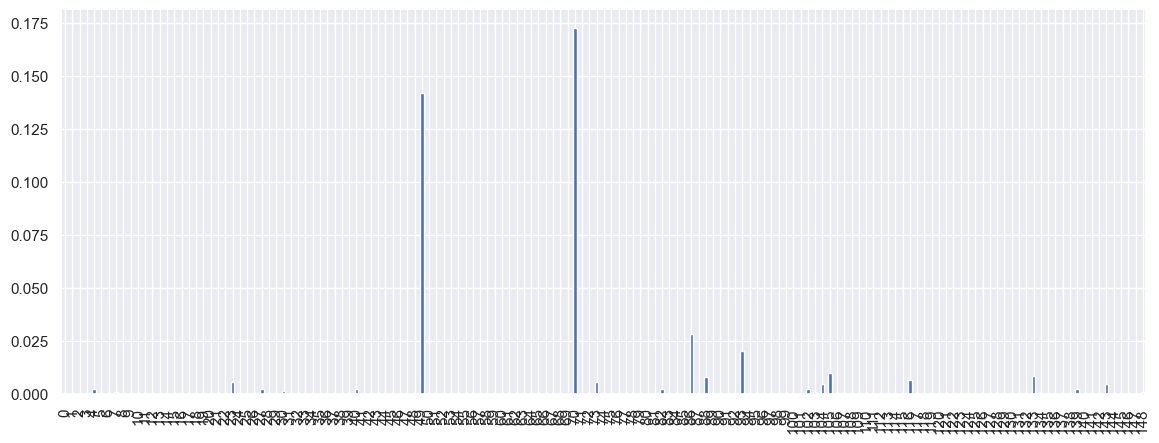

In [21]:
(p_values - p_values2).plot.bar(figsize=(14, 5))

In [22]:
p_values > 0.005

0      False
1      False
2      False
3      False
4      False
       ...  
181    False
182    False
183    False
184    False
185    False
Name: p-value, Length: 186, dtype: bool

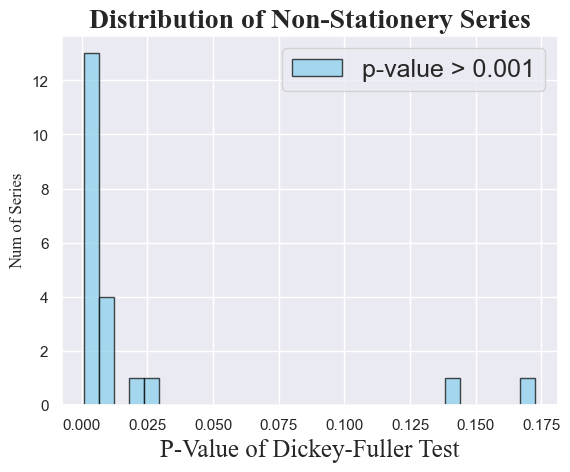

In [39]:
# 绘制直方图
plt.hist(p_values[p_values > 0.001], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='p-value > 0.001')

# 添加标题和标签
plt.title('Distribution of Non-Stationery Series', fontsize=20, fontfamily='Times New Roman', fontweight="bold")
plt.xlabel('P-Value of Dickey-Fuller Test', fontfamily='Times New Roman', fontsize=18)
plt.ylabel('Num of Series', fontfamily='Times New Roman')

# 显示图表
plt.legend(fontsize=18)
plt.show()

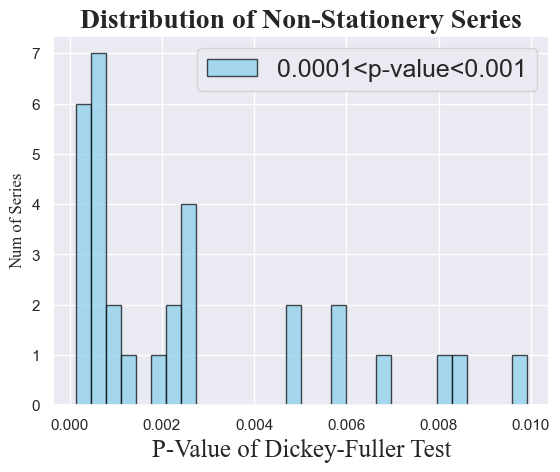

In [40]:
# 绘制直方图
plt.hist(p_values[(p_values > 0.0001) & (p_values <= 0.01)], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='0.0001<p-value<0.001')

# 添加标题和标签
plt.title('Distribution of Non-Stationery Series', fontsize=20, fontfamily='Times New Roman', fontweight="bold")
plt.xlabel('P-Value of Dickey-Fuller Test', fontfamily='Times New Roman', fontsize=18)
plt.ylabel('Num of Series', fontfamily='Times New Roman')

# 显示图表
plt.legend(fontsize=18)
plt.show()